# **pykitPIV** image generation sandbox

You can use this Jupyter notebook to view sample images that will be produced with the given settings.

***

In [2]:
import numpy as np
import time
#import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [12]:
n_images = 1
size_buffer = 10
image_height = 256
image_width = 256
time_separation = 1
diameters_min, diameters_max = (40, 60)
densities_min, densities_max = (0.3, 0.31)
diameter_std = 0.5
gaussian_filters_min, gaussian_filters_max = (40, 40.1)
gaussian_filters_min, gaussian_filters_max = (1, 1)

n_gaussian_filter_iter = 1
displacement_min, displacement_max = (2, 3)
n_steps = 10
exposures_min, exposures_max = (0.9, 0.95)
laser_beam_thickness = 1
laser_beam_shape = 0.95
alpha_denominator = 20
random_seed = 100

image_size = (image_height, image_width)

***

## Image generation as per `pykitPIV-generate-images.py` script

Particles added to the image.


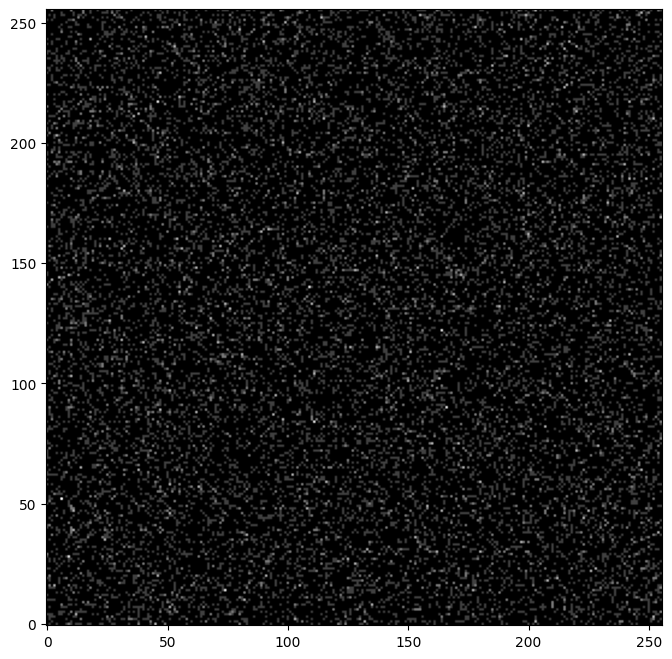

In [16]:
image = Image(random_seed=random_seed)

particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=10,
                     diameters=(40, 60),
                     densities=(densities_min, densities_max),
                     diameter_std=diameter_std,
                     random_seed=random_seed)

image.add_particles(particles)

image.plot(0,
           instance=1, 
           figsize=(8,8));

In [5]:


flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=random_seed)

flowfield.generate_random_velocity_field(gaussian_filters=(gaussian_filters_min, gaussian_filters_max),
                                         n_gaussian_filter_iter=n_gaussian_filter_iter,
                                         displacement=(displacement_min, displacement_max))

motion = Motion(particles,
                flowfield,
                time_separation=time_separation)

motion.runge_kutta_4th(n_steps=n_steps)

image = Image(random_seed=random_seed)

image.add_particles(particles)
image.add_flowfield(flowfield)
image.add_motion(motion)

image.add_reflected_light(exposures=(exposures_min, exposures_max),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=laser_beam_thickness,
                          laser_beam_shape=laser_beam_shape,
                          alpha=1/alpha_denominator)

Particles added to the image.
Velocity field added to the image.
Particle movement added to the image.
Reflected light added to images I1.
Reflected light added to images I2.


***

## Visualize samples

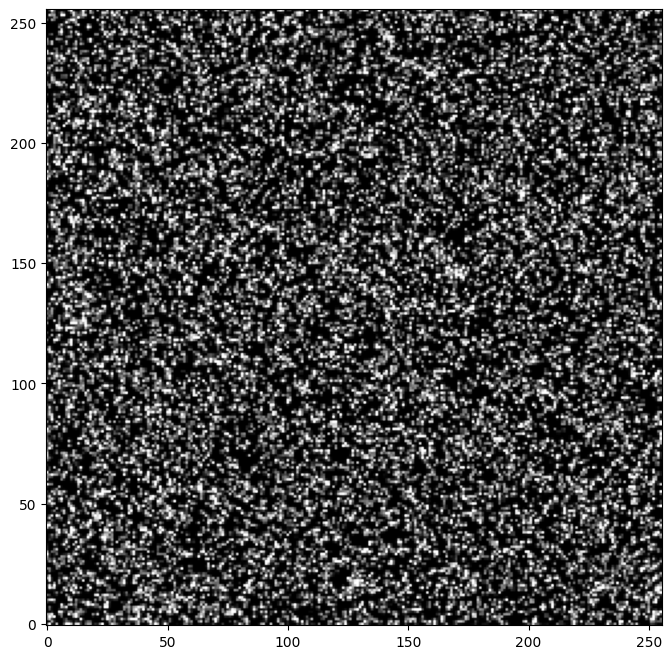

In [7]:
image.plot(0,
           instance=1, 
           figsize=(8,8));

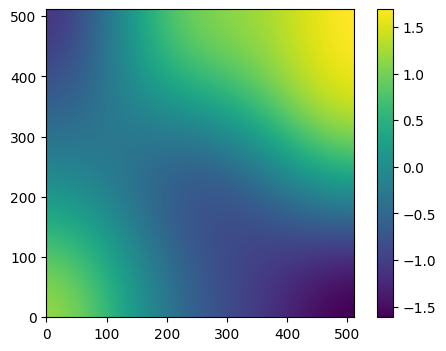

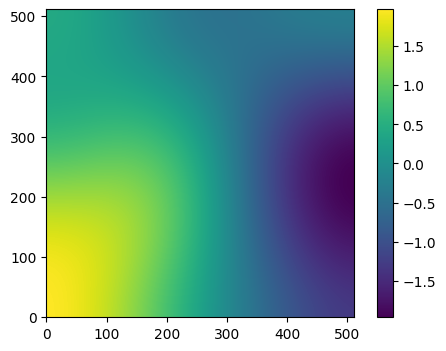

In [9]:
image.plot_field(0,
                 figsize=(6,4));

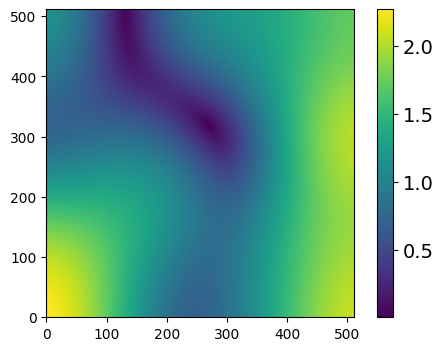

In [13]:
image.plot_field_magnitude(0,
                           figsize=(6,4));

***

© K. Zdybał, C. Mucignat, I. Lunati (2024)